# Исследование Procrastinate Pro+

Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.\
Необходимо изучить:
- откуда приходят пользователи и какими устройствами они пользуются;
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент;
- когда расходы на привлечение клиента окупаются;
- какие факторы мешают привлечению клиентов.\
\
По итогам исследования необходимо составить рекомендации для отдела маркетинга по поводу неэффективности рекламной кампании.

## Выводы по оценке окупаемости рекламы
`Наиболее проблемными` можно обозначить следующие категории: `самыми дорогими` в привлечении пользователями являются пользователи **iPhone** и **Mac**.\
Очень `дорого` обходится привлечение пользователей из **United States**: `динамика окупаемости` их привлечения практически весь срок находится `ниже линии окупаемости`.\
\
Что касается `источников привлечения`, то `самым дорогим` оказывается **TipTop**, притом график `динамики стоимости привлечения` пользователей через этот источник `коррелирует с графиком затрат на привлечение` пользователей из **United States**. 
Несмотря на `хорошие показатели графика конверсии` пользователей из **United States**, `график удержания платящих пользователей` демонстрирует `самые низкие показатели`.\
Можно предположить, что `стоимость рекламы` в стране с `первой экономикой в мире` очень высока и поэтому требует больших затрат, однако `качество привлечённых пользователей сильно страдает`.\
\
Также стоит обратить внимание на два источника привлечения пользователей: **FaceBoom** и **AdNonSense**. Несмотря на `отличные показатели конверсии`, `показатели удержания` у данных источников `значительно ниже` других источников.

## Рекомендации для отдела маркетинга
- Больше `диверсифицировать рекламный бюджет` (**больше 80%** бюджета потрачено на два источника) стоит обратить внимание на **lambdaMediaAds**, **RocketSuperAds** и **WahooNetBanner**.  
 - Внимательно `проанализировать взаимодействие` с источниками  **FaceBoom** и **AdNonSense**: возможно они каким-то образом `искусственно создают трафик` привлечённых пользователей, так как при `отличных показателях конверсии`, `показатели удержания` изначально `почти в два раза ниже`, чем у других источников, а под конец анализируемого периода `удержание` от этих источников `становится практически нулевым`. 
 - `Оценить целесообразность` использования источника **TipTop**, цена привлечения пользователя в котором `почти в три раза выше`, чем в ближайшем по стоимости источнике.
 - `Проверить приложение` на технические ошибки для пользователей **Apple**, так как `стоимость их привлечения очень высокая`, а `удержание нет`.
 - `Обратить дополнительное внимание` на пользователей **PC**: при `низких показателях конверсии` они показывают `высокие результаты по удержанию и окупаемости`.
 - `Проанализировать рынок`  **United States**: при `очень высокой стоимости привлечения` пользователей из этой страны и `высоких показателях конверсии`, `показатели удержания` находятся `существенно ниже` всех остальных стран. Возможно пользователи из **United States** сталкиваются с техническими трудностями или не учтены культурные особенности данного региона.
 - Возможно стоит `расширить присутствие` в **Европе**: пользователи из этого региона показывают `хорошие результаты окупаемости и удержания`.

## Открываем файл с данными и изучаем общую информацию, обрабатываем данные

In [1]:
# импортируем библиотеки
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
sns.set()

In [2]:
# читаем файлы csv
visits, orders, costs = (
    pd.read_csv('visits_info_short.csv'),  # журнал сессий
    pd.read_csv('orders_info_short.csv'),  # заказы
    pd.read_csv('costs_info_short.csv'),  # расходы на рекламу
)

display(visits.head(), orders.head(), costs.head())

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
# приводим названия столбцов к нижнему регистру и убираем пробелы
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
costs.columns = costs.columns.str.lower()

display(visits.head(), orders.head(), costs.head())

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


#### Описание данных
- ##### visits:
 * **user_id** — уникальный идентификатор пользователя\
 * **region** — страна пользователя\
 * **device** — тип устройства пользователя\
 * **channel** — идентификатор источника перехода\
 * **session_start** — дата и время начала сессии\
 * **session_end** — дата и время окончания сессии
- ##### orders:
 * **user_id** — уникальный идентификатор пользователя\
 * **event_dt** — дата и время покупки\
 * **revenue** — сумма заказа\
- ##### costs:
 * **dt** — дата проведения рекламной кампании\
 * **channel** — идентификатор рекламного источника\
 * **costs** — расходы на эту кампанию\

In [4]:
# ищем пропущенные значения
display(visits.isna().sum(), orders.isna().sum(), costs.isna().sum())

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

user_id     0
event_dt    0
revenue     0
dtype: int64

dt         0
channel    0
costs      0
dtype: int64

In [5]:
# ищем явные дубликаты
display(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())

0

0

0

In [6]:
display(visits.info())
display(orders.info())
display(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

In [7]:
# меняем тип данных столбцов с датой
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Пропущенных значений и дубликатов нет, типы данных заменены, переходим к анализу данных.

## Задаём функции для расчёта и анализа LTV, ROI, удержания и конверсии

In [8]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [9]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [10]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [11]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [12]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [13]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 20))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(4, 1, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(4, 1, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(4, 1, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(4, 1, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [14]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 15))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(2, 1, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(2, 1, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [15]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 30))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(5, 1, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(5, 1, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(5, 1, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(5, 1, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(5, 1, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Исследовательский анализ данных

### Профили пользователей, минимальная и максимальная дата привлечения пользователей

In [16]:
# получаем профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [17]:
# находим минимальную и максимальную даты привлечения пользователей
print('Минимальная дата привлечения пользователей -', profiles['dt'].min())
print('Максимальная дата привлечения пользователей -', profiles['dt'].max())

Минимальная дата привлечения пользователей - 2019-05-01
Максимальная дата привлечения пользователей - 2019-10-27


Вызвали функцию, получили профили пользователей. Увидели, что пользователи привлекались **с 1 мая по 27 октября 2019 г.** что и было указано в описании данных.

### Страны пользователей, страны лидеры по платящим пользователям

In [18]:
# группируем профили по стране и смотрим страны в которых больше всего платящих пользователей
user_countries = (profiles.groupby('region')
                  .agg({'user_id' : 'nunique', 'payer' : ['sum', 'mean']}))
user_countries.columns = ['users', 'payers', 'payers, %']
user_countries = user_countries.sort_values(by='payers, %', ascending=False).style.format({'payers, %': '{:,.2%}'.format})
user_countries

,users,payers,"payers, %"
region,,,
United States,100002,6902,6.90%
Germany,14981,616,4.11%
UK,17575,700,3.98%
France,17450,663,3.80%


По таблице мы видим, что пользователи приходят в приложение из **United States**, **Germany**, **UK** и **France**. Лидером по `количеству пользователей` с большим отрывом является **United States**. То же самое касается и `процента платящих пользователей`, но здесь отрыв уже не такой значительный.

### Устройства пользователей, устройства платящих пользователей

In [19]:
# группируем профили по устройству и смотрим устройства с которых заходит больше всего платящих пользователей
user_devices = (profiles.groupby('device')
                  .agg({'user_id' : 'nunique', 'payer' : ['sum', 'mean']}))
user_devices.columns = ['users', 'payers', 'payers, %']
user_devices = user_devices.sort_values(by='payers, %', ascending=False).style.format({'payers, %': '{:,.2%}'.format})
user_devices

,users,payers,"payers, %"
device,,,
Mac,30042,1912,6.36%
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%


По таблице мы видим, что в лидерах `по количеству пользователей` устройства от `Apple` - **Mac** и **iPhone**. Пользователей **Mac** по статистике меньше всех, однако среди них самый большой процент платящих. Также и процент платящих пользователей на этих устройствах немного выше. Хуже всего платят пользователи **PC**.

### Источники привлечения пользователей, источники с наибольшим числом платящих пользователей

In [20]:
# группируем профили по каналу привлечения и смотрим каналы из которых приходит больше всего платящих пользователей
user_channels = (profiles.groupby('channel')
                  .agg({'user_id' : 'nunique', 'payer' : ['sum', 'mean']}))
user_channels.columns = ['users', 'payers', 'payers, %']
user_channels = user_channels.sort_values(by='payers, %', ascending=False).style.format({'payers, %': '{:,.2%}'.format})
user_channels

,users,payers,"payers, %"
channel,,,
FaceBoom,29144,3557,12.20%
AdNonSense,3880,440,11.34%
lambdaMediaAds,2149,225,10.47%
TipTop,19561,1878,9.60%
RocketSuperAds,4448,352,7.91%
WahooNetBanner,8553,453,5.30%
YRabbit,4312,165,3.83%
MediaTornado,4364,156,3.57%
LeapBob,8553,262,3.06%


По таблице мы видим, что безусловным лидером `по количеству привлечённых платящих пользователей` является канал **FaceBoom**. Этот же канал является и лидером `по проценту платящих пользователей от привлечённых`. Среди лидеров `по проценту привлечённых платящих пользователей` также находятся каналы **AdNonSense**, **lambdaMediaAds** и **TipTop**. Абсолютным лидером `по количеству привлечённых пользователей` является канал **organic**, однако по статистике видно, что пользователи, пришедшие самостоятельно, `хуже всего конвертируются в платящих`.

## Маркетинг

### Общая сумма расходов на маркетинг

In [21]:
# складываем все расходы на маркетинг, округлим до 1 знака
print('Общая сумма расходов на маркетинг:', costs['costs'].sum().round(1))

Общая сумма расходов на маркетинг: 105497.3


### Распределение затрат по рекламным источникам

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


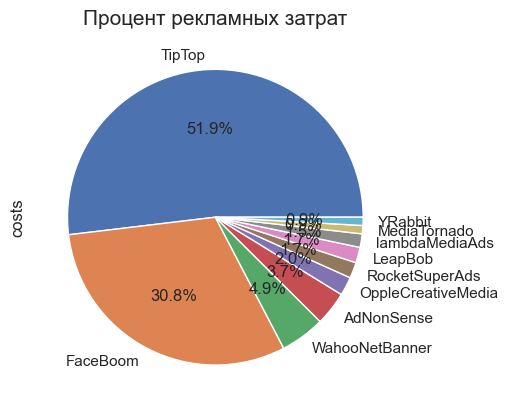

In [22]:
# группируем затраты по источникам
costs_channels = (costs.groupby('channel')
                  .agg({'costs' : 'sum'})
                  .sort_values(by='costs', ascending=False))
display(costs_channels)
costs_channels.plot.pie(
    y='costs',
    radius=(1),
    legend=False,
    autopct='%1.1f%%')
plt.title('Процент рекламных затрат', fontsize=15)
plt.show()

По данным видим, что больше всего и с большим отрывом денег потрачено на источники **TipTop** и **FaceBoom** (`больше 80%` бюджета выделено на два источника), меньше всего на **YRabbit** и **MediaTornado**.

### Динамика изменений расходов во времени

In [23]:
# добавляем столбцы недели и месяца в датафрейм с расходами на рекламу
costs['week'] = costs['dt'].astype('datetime64[W]')
costs['month'] = costs['dt'].astype('datetime64[M]')
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,2019-04-25,2019-05-01
1,2019-05-02,FaceBoom,78.1,2019-05-02,2019-05-01
2,2019-05-03,FaceBoom,85.8,2019-05-02,2019-05-01
3,2019-05-04,FaceBoom,136.4,2019-05-02,2019-05-01
4,2019-05-05,FaceBoom,122.1,2019-05-02,2019-05-01


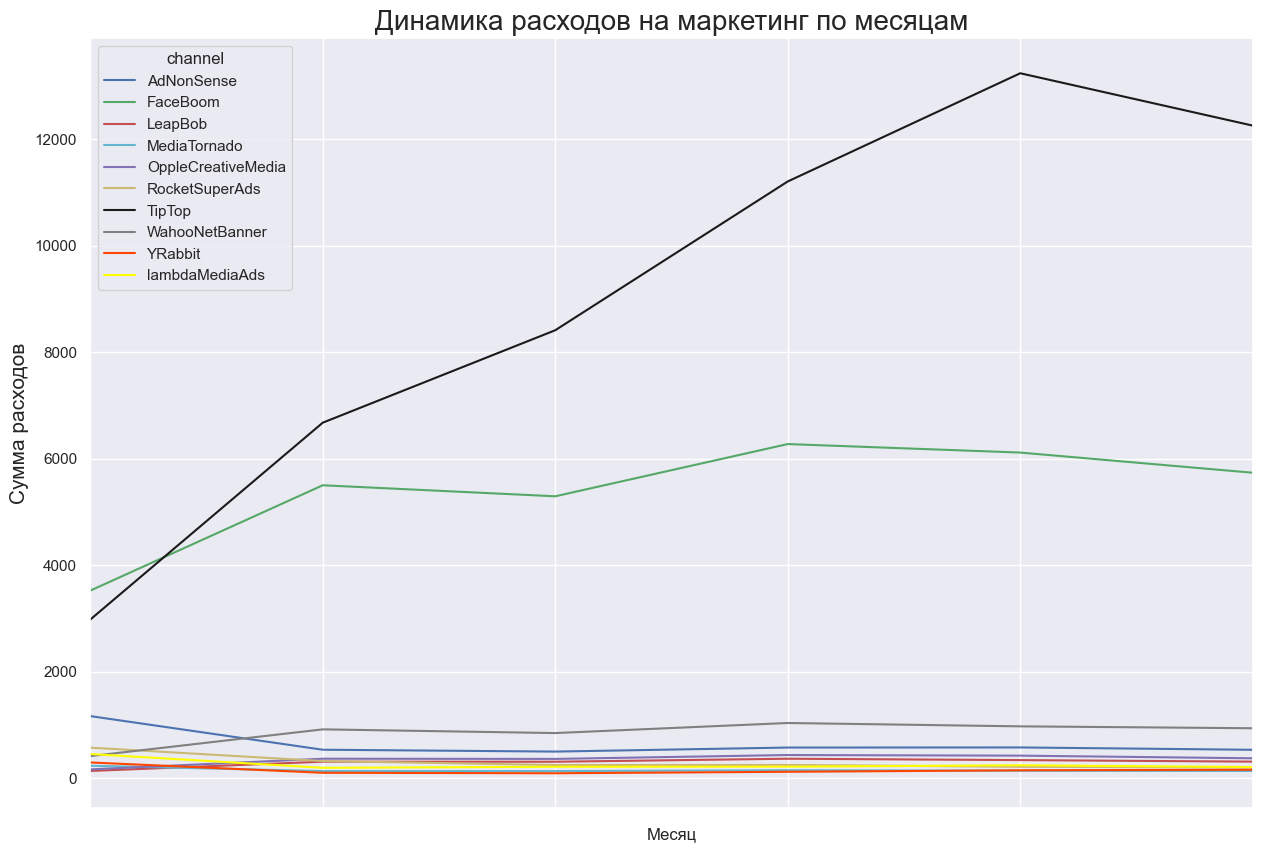

In [24]:
(
    costs.pivot_table
    (index='month',
     columns='channel',
     values='costs',
     aggfunc='sum')
    .plot
    (
        figsize=(15,10),
        grid=True,
        color=['b','g','r','c','m','y','k','grey','orangered','yellow']
    )
)
plt.title('Динамика расходов на маркетинг по месяцам', fontsize=20)
plt.xlabel('Месяц')
plt.xticks(costs['month'].unique())
plt.ylabel('Сумма расходов', fontsize=15)
plt.show()

In [ ]:
(
    costs.pivot_table
    (index='week',
     columns='channel',
     values='costs',
     aggfunc='sum')
    .plot
    (
        figsize=(15,10),
        grid=True,
        color=['b','g','r','c','m','y','k','grey','orangered','yellow']
    )
)
plt.title('Динамика расходов на маркетинг по неделям', fontsize=20)
plt.xlabel('')
plt.xticks(costs['week'].unique())
plt.ylabel('Сумма расходов', fontsize=15)
plt.show()

По данным графикам мы видим, что расходы на источники **TipTop** и **FaceBoom** скачками растут с мая до конца сентября и только с последней недели сентября начинают снижаться. Остальные источники, кроме указанных двух, практически не финансируются.

### Средняя стоимость привлечения пользователя по источникам

In [ ]:
# группируем профили по каналу привлечения и смотрим среднюю стоимость привлечения пользователя
cac = (profiles.groupby('channel')
                 .agg({'acquisition_cost' : 'mean'})
                 .sort_values(by='acquisition_cost'))
cac

По таблице видно, что источники, на которые потрачен практически весь бюджет - **TipTop** и **FaceBoom**, на самом деле принесли самых дорогих пользователей. Большинство из остальных источников привлекают пользователей значительно дешевле.

## Оценка окупаемости рекламы

### Окупаемость рекламы

In [ ]:
# задаём момент анализа (1 ноября 2019)
observation_date = datetime(2019, 11, 1).date()
# задаём горизонт анализа (1 ноября 2019)
horizon_days = 14

In [ ]:
# исключаем из профилей пользователей, пришедших самостоятельно
profiles = profiles.query('channel != "organic"')

In [ ]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Судя по данным графикам, **LTV** `растёт`, однако **динамика LTV** `остаётся примерно на одном уровне`, чего не скажешь о **стоимости привлечения пользователей**: начиная с середины мая, **динамика стоимости привлечения пользователей** `начала расти и продолжала расти` до конца анализируемого периода.\
**ROI** `растёт` в течение всего изучаемого периода, но не пересекает линию окупаемости. **Динамика ROI** `резко снижается` начиная с самого первого дня. В целом, `расходы на рекламу не окупаются`.

In [ ]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам видно, что `самыми дорогими` в привлечении пользователями являются пользователи **iPhone** и **Mac**. `Дешевле всего` обходятся пользователи **PC**. Пользователи **PC** являются единственной группой, которая `выходит на окупаемость` к концу анализируемого периода, однако `динамика окупаемости` говорит о том, что `окупаемость привлечения всех групп` пользователей `снижается весь исследуемый срок`.

In [ ]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

На графиках видим серьёзное отличие в стоимости привлечения пользователей из **United States** и, если `стоимость привлечения пользователей из других стран`, начиная с июня даже `снижается`, то `стоимость привлечения пользователей` из **United States** `резко растёт`. По этой же причине пользователи из **United States** являются `единственной группой`, чьё привлечение `абсолютно не окупается`, что видно на графике **ROI**.

In [ ]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В разбивке по источникам видим, что `самый большой вклад` в среднюю стоимость привлечения пользователей вносит источник **TipTop**, к концу анализируемого периода отрываясь `больше, чем в 3 раза от средней стоимости привлечения пользователей`.\
На графике **ROI** мы видим три источника, которые абсолютно `не окупаются`: **TipTop**, **FaceBoom** и **AdNonSense**.

### Конверсия и удержание пользователей

In [ ]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

По графикам видим, что `лучшую конверсию` показывают пользователи **Apple**, `худшую` - пользователи **PC**.

In [ ]:
# смотрим удержание с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

По графикам видно, что `удержание равномерно снижается` для пользователей всех устройств, однако пользователи **PC** показывают результаты `чуть лучше`, а пользователи **iPhone** `чуть хуже`.

In [ ]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

На графиках сильно выделяются пользователи из **United States**, показывая `наилучшую конверсию`. Пользователи из `других стран` показывают примерно `одинаковые результаты`.

In [ ]:
# смотрим удержание с разбивкой по странам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

Лучшие результаты по удержанию показывают пользователи из **UK** и **France**, хуже всего обстоят дела с пользователями из **United States**.

In [ ]:
# смотрим конверсию с разбивкой по источникам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В лидерах по конверсии пользователей **FaceBoom**, **AdNonSense** и **lambdaMediaAds**. Худшую конверсию показывают пользователи, привлечённые **OppleCreativeMedia**, **LeapBob**, **MediaTornado** и **YRabbit**.

In [ ]:
# смотрим удержание с разбивкой по источникам привлечения
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions)

plot_retention(retention_grouped, retention_history, horizon_days) 

В среднем `все источники` показывают примерно `один уровень удержания` за исключением двух: **FaceBoom** и **AdNonSense** изначально показывают удержание почти `в два раза ниже`, а под конец анализируемого периода `удержание` от этих источников `становится практически нулевым`.

## Выводы по оценке окупаемости рекламы
`Наиболее проблемными` можно обозначить следующие категории: `самыми дорогими` в привлечении пользователями являются пользователи **iPhone** и **Mac**.\
Очень `дорого` обходится привлечение пользователей из **United States**: `динамика окупаемости` их привлечения практически весь срок находится `ниже линии окупаемости`.\
\
Что касается `источников привлечения`, то `самым дорогим` оказывается **TipTop**, притом график `динамики стоимости привлечения` пользователей через этот источник `коррелирует с графиком затрат на привлечение` пользователей из **United States**. 
Несмотря на `хорошие показатели графика конверсии` пользователей из **United States**, `график удержания платящих пользователей` демонстрирует `самые низкие показатели`.\
Можно предположить, что `стоимость рекламы` в стране с `первой экономикой в мире` очень высока и поэтому требует больших затрат, однако `качество привлечённых пользователей сильно страдает`.\
\
Также стоит обратить внимание на два источника привлечения пользователей: **FaceBoom** и **AdNonSense**. Несмотря на `отличные показатели конверсии`, `показатели удержания` у данных источников `значительно ниже` других источников.

## Рекомендации для отдела маркетинга
- Больше `диверсифицировать рекламный бюджет` (**больше 80%** бюджета потрачено на два источника) стоит обратить внимание на **lambdaMediaAds**, **RocketSuperAds** и **WahooNetBanner**.  
 - Внимательно `проанализировать взаимодействие` с источниками  **FaceBoom** и **AdNonSense**: возможно они каким-то образом `искусственно создают трафик` привлечённых пользователей, так как при `отличных показателях конверсии`, `показатели удержания` изначально `почти в два раза ниже`, чем у других источников, а под конец анализируемого периода `удержание` от этих источников `становится практически нулевым`. 
 - `Оценить целесообразность` использования источника **TipTop**, цена привлечения пользователя в котором `почти в три раза выше`, чем в ближайшем по стоимости источнике.
 - `Проверить приложение` на технические ошибки для пользователей **Apple**, так как `стоимость их привлечения очень высокая`, а `удержание нет`.
 - `Обратить дополнительное внимание` на пользователей **PC**: при `низких показателях конверсии` они показывают `высокие результаты по удержанию и окупаемости`.
 - `Проанализировать рынок`  **United States**: при `очень высокой стоимости привлечения` пользователей из этой страны и `высоких показателях конверсии`, `показатели удержания` находятся `существенно ниже` всех остальных стран. Возможно пользователи из **United States** сталкиваются с техническими трудностями или не учтены культурные особенности данного региона.
 - Возможно стоит `расширить присутствие` в **Европе**: пользователи из этого региона показывают `хорошие результаты окупаемости и удержания`.